## IMPORTING NECCESARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd

## LOADING IN THE DATA

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Unnamed: 0,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5570, 5)

## CLEANING THE DATA

In [5]:
df.info()
# WE CAN SEE THAT THE LAST THREE COLUMNS ARE ALMOST EMPTY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5570 non-null   object
 1   v2          5570 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [6]:
# DROPPING THE LAST THREE COLUMNS
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.head()

,Unnamed: 0,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# RENAMING THE COLUMNS
df.rename(columns = {'Unnamed: 0' : 'Target','v2' : 'Text'}, inplace = True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# TURNING THE HAM AND SPAM IN TARGET INTO NUMBERS

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# CHECKING FOR MISSING VALUES
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
# CHECKING FOR DUPLICATE VALUES
df.duplicated().sum()

409

In [15]:
# DROPPING THE DUPLICATED VALUES
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

## EXPLORATORY DATA ANALYSIS

In [17]:
df['Target'].value_counts()

0    4514
1     647
Name: Target, dtype: int64

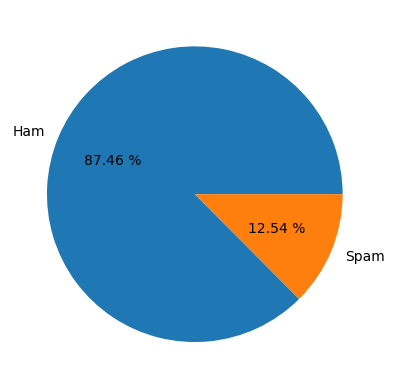

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['Target'].value_counts(),labels = ['Ham','Spam'], autopct = '%0.2f %%')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['Num_Alphabets'] = df['Text'].apply(len)

In [22]:
df.head()

,Target,Text,Num_Alphabets
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['Num_Words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Target,Text,Num_Alphabets,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['Num_Sentances'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Target,Text,Num_Alphabets,Num_Words,Num_Sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
# GENERAL STATS FOR HAM TEXTS
df[df['Target'] == 0][['Num_Alphabets','Num_Words','Num_Sentances']].describe()

,Num_Alphabets,Num_Words,Num_Sentances
count,4514.000000,4514.000000,4514.000000
mean,70.449712,17.126052,1.799956
std,56.360126,13.494492,1.278637
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# GENERAL STATS FOR SPAM TEXTS
df[df['Target'] == 1][['Num_Alphabets','Num_Words','Num_Sentances']].describe()

,Num_Alphabets,Num_Words,Num_Sentances
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.964451
std,30.096861,7.038065,1.484795
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


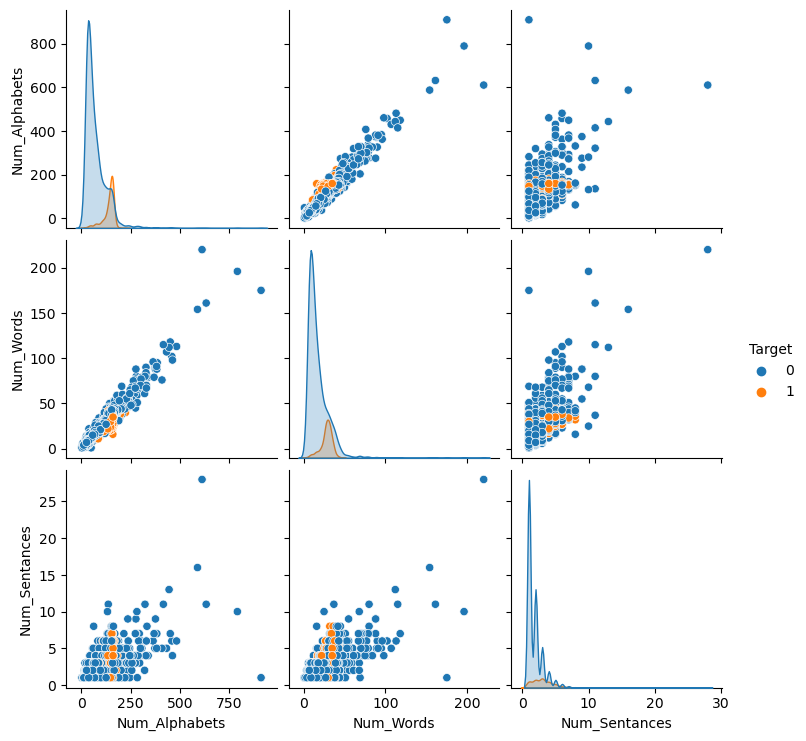

In [29]:
import seaborn as sns

sns.pairplot(df,hue = 'Target')
plt.show()

## DATA PREPROCESSING

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [226]:
# MAKING A FUNCTION TO PERFORM ALL THE PREPROCESSING

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [227]:
transform_text('i SAW pranav DAncing!')

'saw pranav danc'

In [228]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [239]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [240]:
df.head()

,Target,Text,Num_Alphabets,Num_Words,Num_Sentances,Transformed Text,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [241]:
spam_corpus = []

for msg in df[df['Target'] == 1]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [242]:
len(spam_corpus)

9861

In [243]:
from collections import Counter

spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


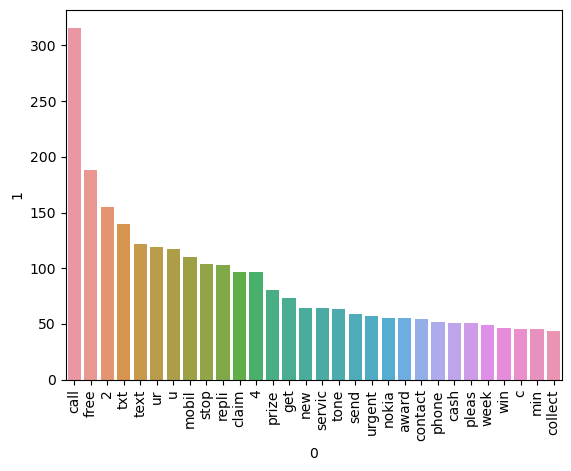

In [262]:
sns.barplot(spam_words[0],spam_words[1])
plt.xticks(rotation = 'vertical')

plt.savefig('Frequent_Words.png')

plt.show()

## MODEL BUILDING

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [245]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [236]:
X.shape

(5161, 6678)

In [246]:
y = df['Target'].values

In [247]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [248]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [249]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [250]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [256]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.9622458857696031
[[906   0]
 [ 39  88]]
1.0
0.8186046511627907


In [259]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9738625363020329
[[902   4]
 [ 23 104]]
0.9629629629629629
0.8851063829787233


## SAVING THE MODEL

In [258]:
import pickle as pkl
pkl.dump(tfidf,open('Vectorizer.pkl','wb'))
pkl.dump(mnb,open('Model.pkl','wb'))